In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from eigenface import EigenFaces
from img_preprocessing import preprocess_images


import pickle

In [2]:
def load_images(path=None, resize=(500, 500)):
    if path is None:
        path = os.path.join(os.getcwd(), 'images')

    images = []
    students = []

    for student in os.listdir(path):
        student_path = os.path.join(path, student)
        
        if os.path.isdir(student_path):
        
            for image in os.listdir(student_path):
                image_path = os.path.join(student_path, image)
        
                if os.path.isfile(image_path):
                    image = cv2.imread(image_path)                    
                    
                    if image.size != resize:
                        image = cv2.resize(image, resize)
                                        
                        
                    images.append(image)
                    students.append(student)
    
    return images, students

In [3]:
test_images, test_students = load_images('test', resize=(250, 250))

In [4]:
with open("models/eigenface_recognizer.pkl", "rb") as f:
    eigenface_recognizer = pickle.load(f)    


face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)


In [5]:

def detect_bounding_box(img):    

    faces = face_classifier.detectMultiScale(
        img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    

    return faces

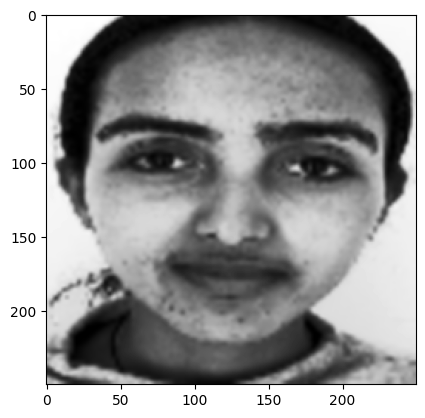

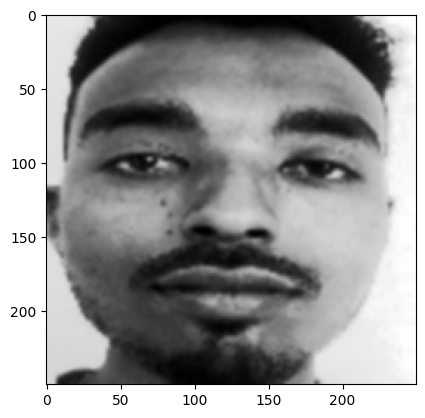

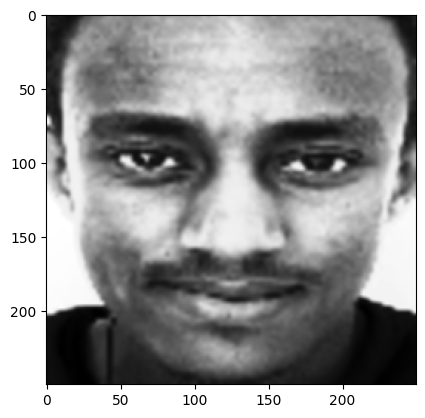

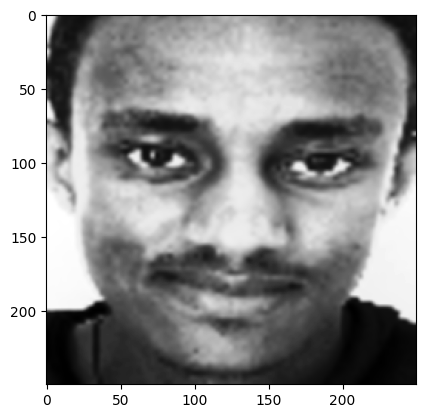

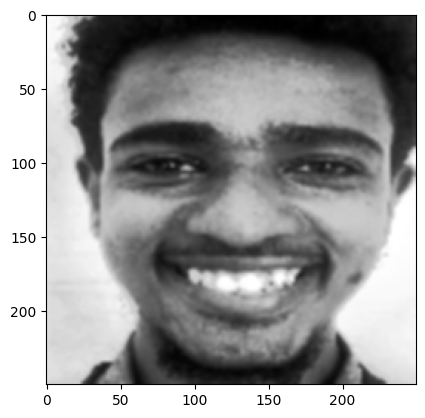

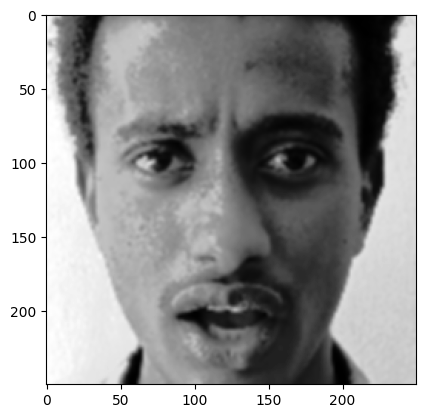

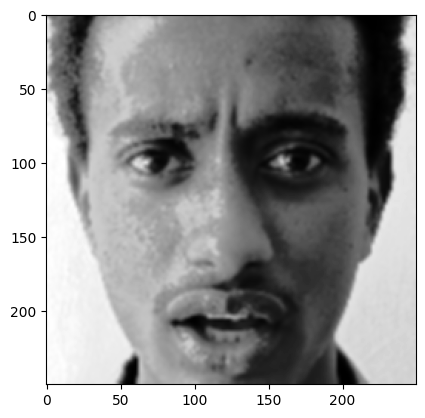

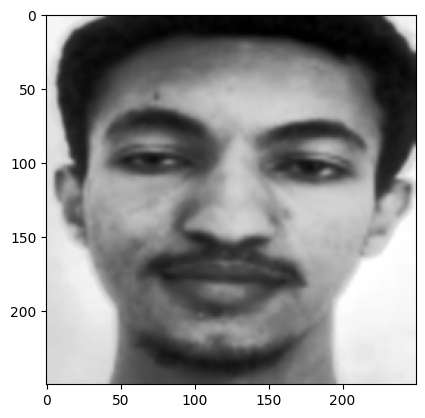

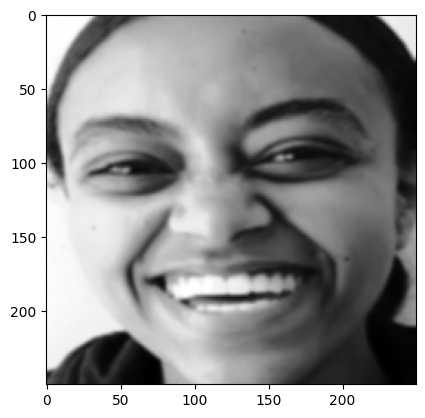

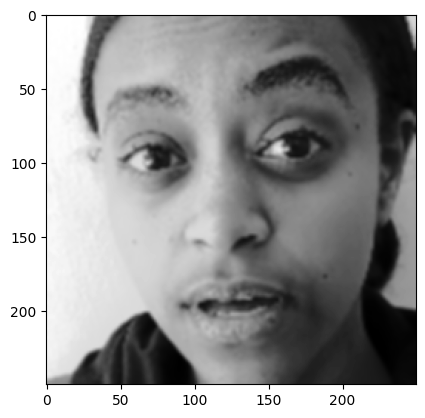

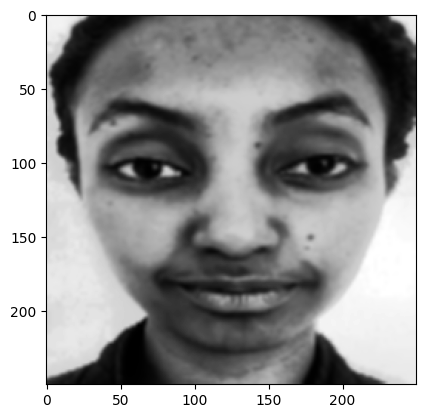

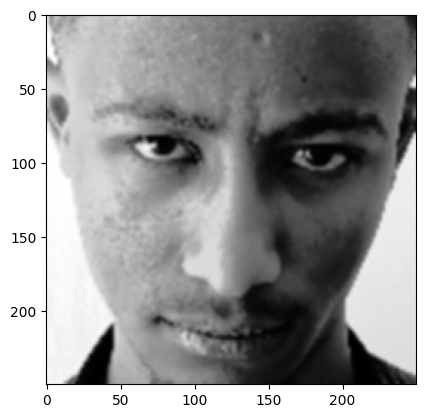

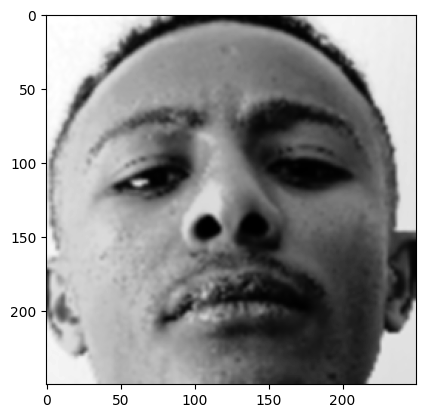

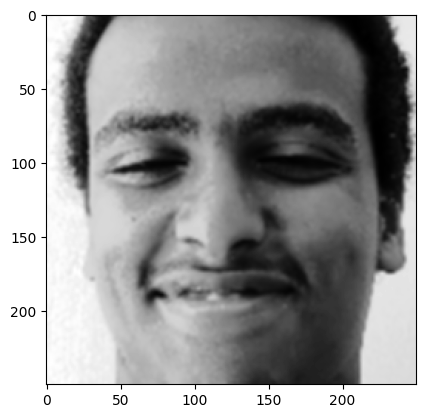

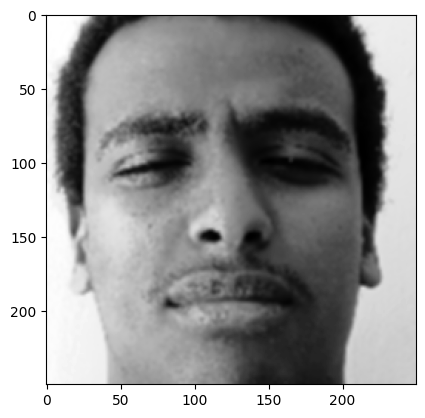

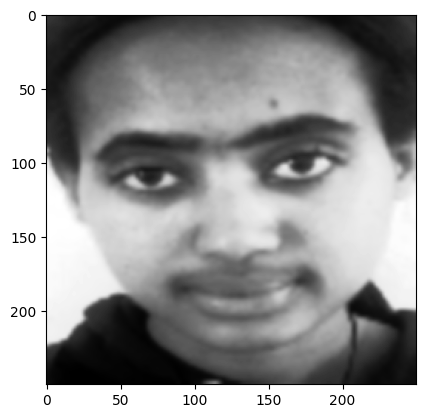

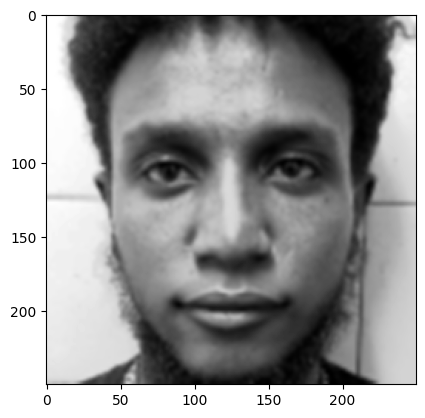

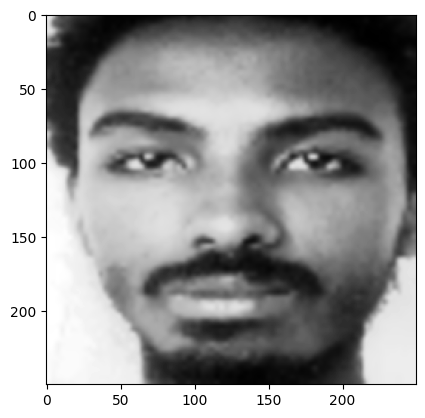

In [6]:
y_pred = []

for image, student in zip(test_images, test_students):  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      
    
    faces = detect_bounding_box(image)

    if len(faces):
        x, y, w, h = faces[0]

        face = image[y:y + h, x:x + w]    

        face = cv2.resize(face, (250, 250))      

        images = preprocess_images([face])               

        predicted = eigenface_recognizer.predict(images)

        if predicted[0] == student:
            plt.imshow(images[0].reshape((250, 250)), cmap="gray")
            plt.show()


        y_pred.append(predicted[0])        
    
    else:
        y_pred.append("Notface")
    

In [7]:
accuracy_score(test_students, y_pred)

0.2903225806451613

In [8]:
y_pred

['Kidus Hunegnaw',
 'Tiruzer Tsedeke',
 'Notface',
 'Yonas Engedu',
 'Yonas Engedu',
 'Melkishi Tesfaye',
 'Kidus Hunegnaw',
 'Betelhem Yimam',
 'Biniyam Haile',
 'Fasika_Fikadu',
 'Nathnael Dereje',
 'Yosef Aweke',
 'Yosef Aweke',
 'Deribew_Shimels',
 'Deribew_Shimels',
 'Esayas Nigussie',
 'Sosina Esayas',
 'Esayas Nigussie',
 'Esayas Nigussie',
 'Melkishi Tesfaye',
 'Yosef Aweke',
 'Dagmawi_Tensay',
 'Dagmawi_Tensay',
 'Fraol Mulugeta',
 'Tiruzer Tsedeke',
 'Geleta Daba',
 'Geleta Daba',
 'Olyad Temesgen',
 'Kidus Hunegnaw',
 'Yosef Aweke',
 'Semir Hamid',
 'Mariam Yohannes',
 'Mariam Yohannes',
 'Melkishi Tesfaye',
 'Semir Hamid',
 'Sahib Semahegn',
 'Milion Tolesa',
 'Milion Tolesa',
 'Fraol Mulugeta',
 'Sosina Esayas',
 'Yosef Aweke',
 'Kidus Hunegnaw',
 'Sahib Semahegn',
 'Sahib Semahegn',
 'Notface',
 'Yanet Mekuria',
 'Sosina Esayas',
 'Yosef Aweke',
 'Kidus Hunegnaw',
 'Nathnael Dereje',
 'Sahib Semahegn',
 'Kidus Hunegnaw',
 'Feven Tesfaye',
 'Sosina Esayas',
 'Sosina Esayas

62